# CCIT4092 Data Visualization
# 05 seaborn: A simple static dashboard

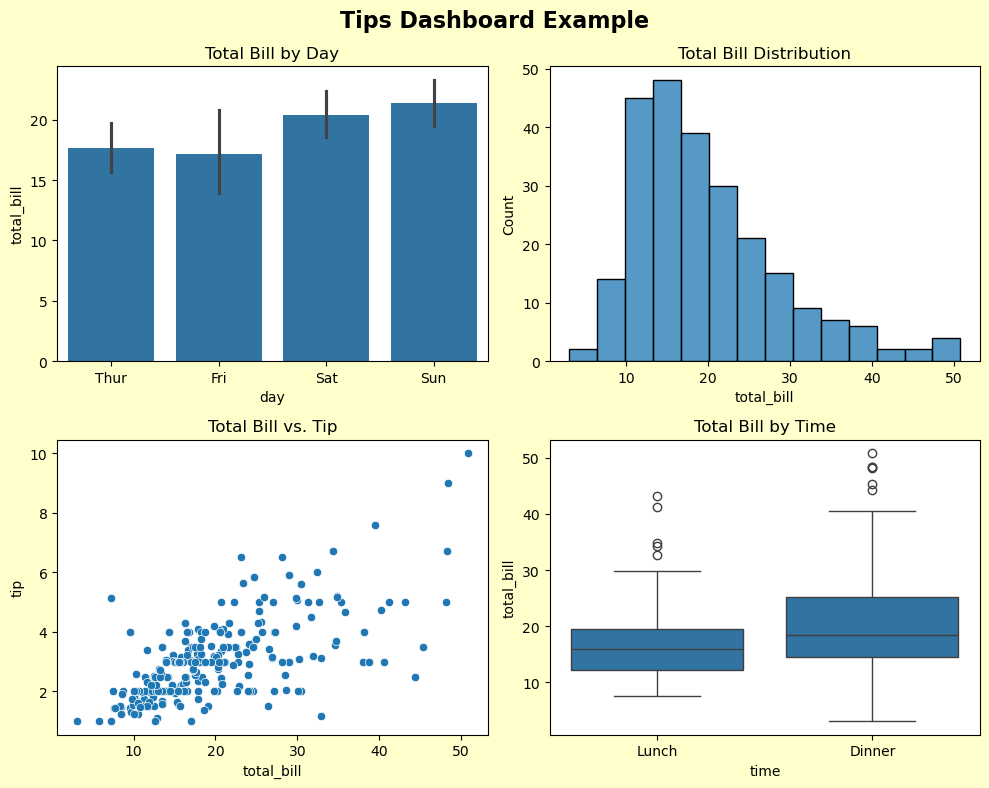

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = sns.load_dataset('tips')

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.patch.set_facecolor('#ffffcc')

plt.suptitle('Tips Dashboard Example', fontsize=16, fontweight='bold')

sns.barplot(x='day', y='total_bill', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Total Bill by Day')

sns.histplot(df['total_bill'], ax=axs[0, 1])
axs[0, 1].set_title('Total Bill Distribution')

sns.scatterplot(x='total_bill', y='tip', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Total Bill vs. Tip')

sns.boxplot(x='time', y='total_bill', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Total Bill by Time')

plt.tight_layout(rect=[0, 0, 1, 1]) #  [left, bottom, right, top]

plt.show()

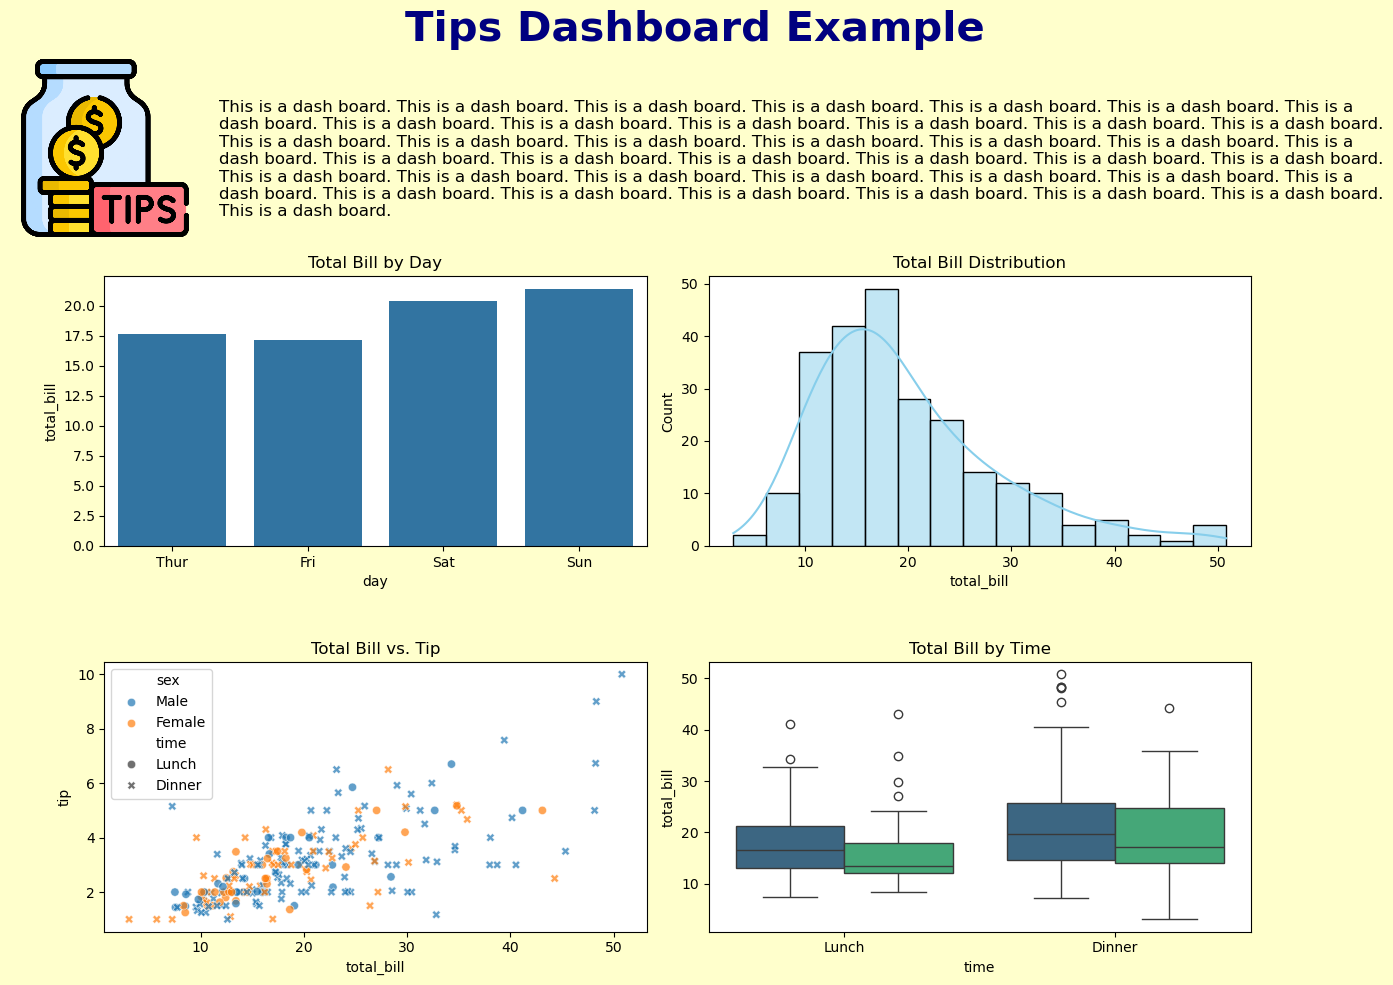

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

df = sns.load_dataset('tips')

fig = plt.figure(figsize=(14, 10))
fig.patch.set_facecolor('#ffffcc')
gs = GridSpec(3, 2, height_ratios=[0.1, 0.45, 0.45])  # Height ratios for rows

plt.suptitle('Tips Dashboard Example', fontsize=30, fontweight='bold', color='navy')

ax_text = fig.add_subplot(gs[0, :])  # Top row spans both columns
ax_text.axis('off')  # Hide axes

paragraph = "This is a dash board. " * 40
ax_text.text(0.1, 1, paragraph, ha='left', fontsize=12, va='top', wrap=True)

money_icon = mpimg.imread('data/tips.png')  # Load your money icon image
imagebox = OffsetImage(money_icon, zoom=0.25)  # Adjust zoom as needed

ab = AnnotationBbox(imagebox, (0, 0.2), frameon=False, xycoords='axes fraction', boxcoords="axes fraction")
ax_text.add_artist(ab)  # Add the image to the axis

axes = [
    fig.add_subplot(gs[1, 0]),  # Total bill by day
    fig.add_subplot(gs[1, 1]),  # Total bill distribution
    fig.add_subplot(gs[2, 0]),  # Total bill vs. tip
    fig.add_subplot(gs[2, 1])   # Total bill by time
]

sns.barplot(x='day', y='total_bill', data=df, ax=axes[0], errorbar=None)
axes[0].set_title('Total Bill by Day')

sns.histplot(df['total_bill'], bins=15, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Total Bill Distribution')

sns.scatterplot(x='total_bill', y='tip', hue='sex', style='time', data=df, ax=axes[2], alpha=0.7)
axes[2].set_title('Total Bill vs. Tip')

sns.boxplot(x='time', y='total_bill', hue='sex', data=df, ax=axes[3], palette="viridis", legend=False) 
axes[3].set_title('Total Bill by Time')
        
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()